Importujemy niezbędne pakiety:

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

Wczytujemy dane do analizy:

In [3]:
sp500 = pd.read_csv('financials.csv', sep=',')

In [4]:
sp500.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


Symbol - str, id, unikalny<br>
Name - str, id, unikalny<br>
Sector - str, id kategorii<br>
Price<br>
PE, Price/Earnings - względny<br>
DY, Dividend Yield - względny<br>
ES, Earnings/Share  - względny<br>
52 Week Low<br>
52 Week High<br>
Market Cap - skala<br>
EBITDA<br>
PS, Price/Sales - względny<br>
PB, Price/Book - względny<br>
SEC Filings - link -> text<br>

In [5]:
sp500.describe()

,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
count,505.000000,503.000000,505.000000,505.000000,505.000000,505.000000,5.050000e+02,5.050000e+02,505.000000,497.000000
mean,103.830634,24.808390,1.895953,3.753743,122.623832,83.536616,4.923944e+10,3.590328e+09,3.941705,14.453179
std,134.427636,41.241081,1.537214,5.689036,155.362140,105.725473,9.005017e+10,6.840544e+09,3.460110,89.660508
min,2.820000,-251.530000,0.000000,-28.010000,6.590000,2.800000,2.626102e+09,-5.067000e+09,0.153186,0.510000
25%,46.250000,15.350000,0.794834,1.490000,56.250000,38.430000,1.273207e+10,7.739320e+08,1.629490,2.020000
50%,73.920000,19.450000,1.769255,2.890000,86.680000,62.850000,2.140095e+10,1.614399e+09,2.896440,3.400000
75%,116.540000,25.750000,2.781114,5.140000,140.130000,96.660000,4.511968e+10,3.692749e+09,4.703842,6.110000
max,1806.060000,520.150000,12.661196,44.090000,2067.990000,1589.000000,8.095080e+11,7.938600e+10,20.094294,1403.380000


In [6]:
data_na=sp500[sp500.isna().any(axis=1)]
data_na

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
55,ARNC,Arconic Inc,Industrials,24.45,20.21,0.956175,-0.21,31.17,21.755,1.212330e+10,1.517000e+09,0.942148,NaN,http://www.sec.gov/cgi-bin/browse-edgar?action...
199,FL,Foot Locker Inc,Consumer Discretionary,45.88,9.50,2.582795,4.91,77.86,28.420,5.819080e+09,9.570000e+08,1.036295,NaN,http://www.sec.gov/cgi-bin/browse-edgar?action...
225,HCA,HCA Holdings,Health Care,95.97,14.07,1.422764,5.94,106.84,71.180,3.444905e+10,8.202000e+09,0.725192,NaN,http://www.sec.gov/cgi-bin/browse-edgar?action...
292,MRO,Marathon Oil Corp.,Energy,15.68,-32.00,1.224740,-2.65,19.52,10.550,1.387501e+10,2.266000e+09,4.657875,NaN,http://www.sec.gov/cgi-bin/browse-edgar?action...
346,OXY,Occidental Petroleum,Energy,68.47,195.63,4.408186,-0.75,78.09,57.200,5.346769e+10,5.205000e+09,6.044895,NaN,http://www.sec.gov/cgi-bin/browse-edgar?action...
358,PEP,PepsiCo Inc.,Consumer Staples,110.15,21.51,2.837004,4.36,122.51,104.770,1.614133e+11,1.284300e+10,3.670506,NaN,http://www.sec.gov/cgi-bin/browse-edgar?action...
360,PRGO,Perrigo,Health Care,84.44,NaN,0.731261,-28.01,95.93,63.680,1.232638e+10,0.000000e+00,3.385007,2.03,http://www.sec.gov/cgi-bin/browse-edgar?action...
430,TPR,"Tapestry, Inc.",Consumer Discretionary,48.85,NaN,0.000000,2.09,50.71,36.690,1.424720e+10,0.000000e+00,4.078549,4.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
450,TDG,TransDigm Group,Industrials,283.00,23.76,0.000000,7.92,321.38,203.720,1.524120e+10,1.635916e+09,4.268832,NaN,http://www.sec.gov/cgi-bin/browse-edgar?action...
460,UNP,Union Pacific,Industrials,124.86,22.06,2.062655,13.52,143.05,101.060,1.015133e+11,1.016900e+10,4.860507,NaN,http://www.sec.gov/cgi-bin/browse-edgar?action...


Sprawdzamy, które wiersze zawierają niekompletne obserwacje i ile ich jest

In [7]:
wybrakowane = sp500[sp500['Price/Earnings'].isnull() 
                    | sp500['Dividend Yield'].isnull() 
                    | sp500['Earnings/Share'].isnull()
                    | sp500['Price/Sales'].isnull()
                    | sp500['Price/Book'].isnull()
                    | sp500['Price'].isnull()
                    | sp500['52 Week Low'].isnull()
                    | sp500['52 Week High'].isnull()]
wybrakowane

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
55,ARNC,Arconic Inc,Industrials,24.45,20.21,0.956175,-0.21,31.17,21.755,1.212330e+10,1.517000e+09,0.942148,NaN,http://www.sec.gov/cgi-bin/browse-edgar?action...
199,FL,Foot Locker Inc,Consumer Discretionary,45.88,9.50,2.582795,4.91,77.86,28.420,5.819080e+09,9.570000e+08,1.036295,NaN,http://www.sec.gov/cgi-bin/browse-edgar?action...
225,HCA,HCA Holdings,Health Care,95.97,14.07,1.422764,5.94,106.84,71.180,3.444905e+10,8.202000e+09,0.725192,NaN,http://www.sec.gov/cgi-bin/browse-edgar?action...
292,MRO,Marathon Oil Corp.,Energy,15.68,-32.00,1.224740,-2.65,19.52,10.550,1.387501e+10,2.266000e+09,4.657875,NaN,http://www.sec.gov/cgi-bin/browse-edgar?action...
346,OXY,Occidental Petroleum,Energy,68.47,195.63,4.408186,-0.75,78.09,57.200,5.346769e+10,5.205000e+09,6.044895,NaN,http://www.sec.gov/cgi-bin/browse-edgar?action...
358,PEP,PepsiCo Inc.,Consumer Staples,110.15,21.51,2.837004,4.36,122.51,104.770,1.614133e+11,1.284300e+10,3.670506,NaN,http://www.sec.gov/cgi-bin/browse-edgar?action...
360,PRGO,Perrigo,Health Care,84.44,NaN,0.731261,-28.01,95.93,63.680,1.232638e+10,0.000000e+00,3.385007,2.03,http://www.sec.gov/cgi-bin/browse-edgar?action...
430,TPR,"Tapestry, Inc.",Consumer Discretionary,48.85,NaN,0.000000,2.09,50.71,36.690,1.424720e+10,0.000000e+00,4.078549,4.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
450,TDG,TransDigm Group,Industrials,283.00,23.76,0.000000,7.92,321.38,203.720,1.524120e+10,1.635916e+09,4.268832,NaN,http://www.sec.gov/cgi-bin/browse-edgar?action...
460,UNP,Union Pacific,Industrials,124.86,22.06,2.062655,13.52,143.05,101.060,1.015133e+11,1.016900e+10,4.860507,NaN,http://www.sec.gov/cgi-bin/browse-edgar?action...


Usuwamy wiersze z NA

In [8]:
sp500.dropna(axis = 0, how ='any', inplace = True)

Obliczamy maksymalny i minimalny zwrot

In [9]:
sp500['52w High'] = sp500[["52 Week High", "52 Week Low"]].max(axis=1)
sp500['52w Low'] = sp500[["52 Week High", "52 Week Low"]].min(axis=1)

In [10]:
sp500['52w High']
sp500['52w Low']

0      175.490
1       48.925
2       42.280
3       60.050
4      114.820
        ...   
500     46.860
501     62.850
502    108.170
503     38.430
504     52.000
Name: 52w Low, Length: 495, dtype: float64

In [11]:
sp500['max zwrot'] = sp500['Price'] / sp500['52w High']
sp500['min zwrot'] = sp500['Price'] / sp500['52w Low']
sp500.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings,52w High,52w Low,max zwrot,min zwrot
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...,259.77,175.490,0.858028,1.270101
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...,68.39,48.925,0.880831,1.231272
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...,64.60,42.280,0.871053,1.330889
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...,125.86,60.050,0.861910,1.806495
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...,162.60,114.820,0.925646,1.310834


Sprawdzamy korelacje występujące pomiędzy poszczególnymi zmiennymi

<AxesSubplot:>

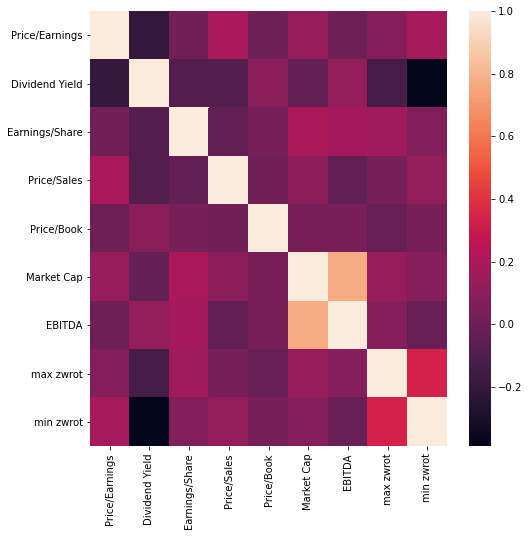

In [12]:
cechy_num = ['Price/Earnings', 'Dividend Yield', 'Earnings/Share', 'Price/Sales', 'Price/Book', 'Market Cap', 'EBITDA','max zwrot','min zwrot']

cor = sp500.loc[:, cechy_num].corr()

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(ax=ax, data=cor)

In [13]:
x = sp500.loc[:, cechy_num].values
y_max = sp500.loc[:, 'max zwrot'].values
y_min = sp500.loc[:, 'min zwrot'].values

x_scaler = StandardScaler().fit_transform(x)

Wykonujemy pierwszą analizę skupień metodą k-średnich. Na bazie metody prób i błędów przyjęty został poziom 5 klastrów

[[2.19341398e+01 1.88781118e+00 3.14500000e+00 3.82630022e+00
  1.18128763e+01 1.88369166e+10 1.67052887e+09 8.28888266e-01
  1.22114041e+00]
 [2.12850000e+01 1.93463354e+00 3.89250000e+00 4.06697424e+00
  3.23500000e+00 3.13110927e+11 1.31611250e+10 8.81910137e-01
  1.24207812e+00]
 [7.30750000e+01 5.75722000e-01 1.13766667e+01 6.88584517e+00
  9.31333333e+00 6.95190401e+11 3.78586667e+10 8.68551950e-01
  1.32584198e+00]
 [2.26514815e+01 2.73960096e+00 4.30259259e+00 4.54767275e+00
  7.01896296e+01 1.79087140e+11 1.56112370e+10 8.49152547e-01
  1.25510522e+00]
 [3.44397561e+01 1.78127491e+00 6.13426829e+00 4.10816532e+00
  9.82414634e+00 7.22283488e+10 4.81633720e+09 8.65376370e-01
  1.24560622e+00]]


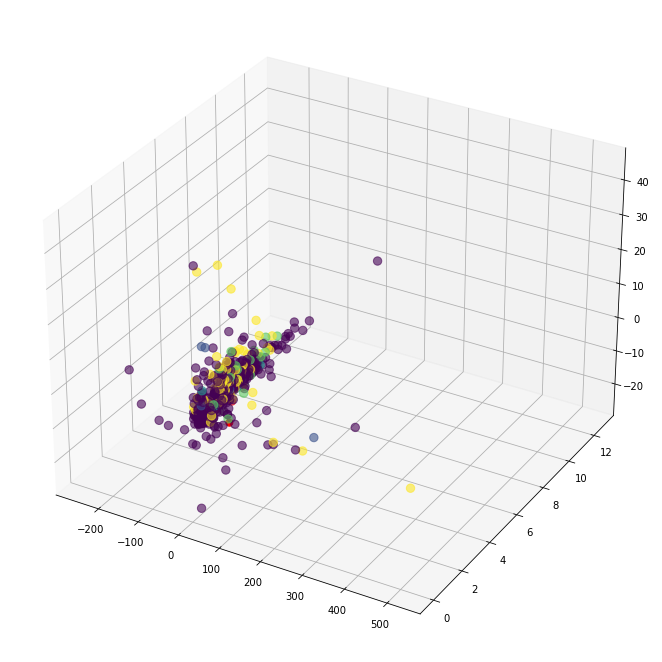

In [14]:
kmeans = KMeans(n_clusters=5).fit(x)
centroids = kmeans.cluster_centers_
print(centroids)
label = kmeans.fit_predict(x)

fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)
cb = ax.scatter(x[:,0],x[:,1],x[:,2], c=label,s=70, alpha=0.6)

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

In [15]:
print(centroids)

[[2.19341398e+01 1.88781118e+00 3.14500000e+00 3.82630022e+00
  1.18128763e+01 1.88369166e+10 1.67052887e+09 8.28888266e-01
  1.22114041e+00]
 [2.12850000e+01 1.93463354e+00 3.89250000e+00 4.06697424e+00
  3.23500000e+00 3.13110927e+11 1.31611250e+10 8.81910137e-01
  1.24207812e+00]
 [7.30750000e+01 5.75722000e-01 1.13766667e+01 6.88584517e+00
  9.31333333e+00 6.95190401e+11 3.78586667e+10 8.68551950e-01
  1.32584198e+00]
 [2.26514815e+01 2.73960096e+00 4.30259259e+00 4.54767275e+00
  7.01896296e+01 1.79087140e+11 1.56112370e+10 8.49152547e-01
  1.25510522e+00]
 [3.44397561e+01 1.78127491e+00 6.13426829e+00 4.10816532e+00
  9.82414634e+00 7.22283488e+10 4.81633720e+09 8.65376370e-01
  1.24560622e+00]]


Liczebność klastrów:

In [16]:
unique, counts = np.unique(label, return_counts=True)
dict(zip(unique, counts))

{0: 372, 1: 6, 2: 8, 3: 25, 4: 84}

In [17]:
filtered_label0 = x[label == 0]
filtered_label1 = x[label == 1]
filtered_label2 = x[label == 2]
filtered_label3 = x[label == 3]
filtered_label4 = x[label == 4]

In [18]:
#filtered_label3[:,7]

Histogramy pokazujące przybliżone rozkłady klastrów (w niektórych przypadkach trudno oszacować miarodajnie, ze względu na małą ilość danych):

(array([  6.,  21.,  96., 249.]),
 array([0.37606336, 0.52526796, 0.67447255, 0.82367714, 0.97288174]),
 <BarContainer object of 4 artists>)

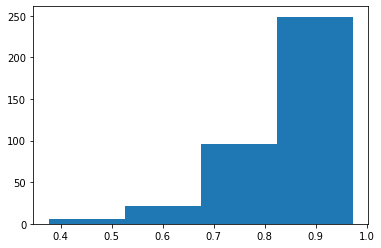

In [19]:
plt.hist(filtered_label0[:,7],bins=4)

(array([2., 1., 2., 1.]),
 array([0.84116027, 0.85625405, 0.87134782, 0.8864416 , 0.90153538]),
 <BarContainer object of 4 artists>)

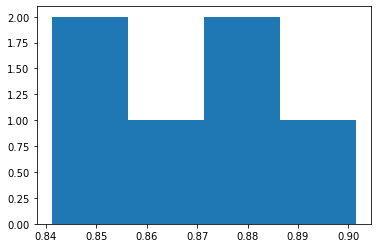

In [20]:
plt.hist(filtered_label1[:,7],bins=4)

(array([3., 0., 2., 3.]),
 array([0.83546976, 0.85642195, 0.87737414, 0.89832633, 0.91927852]),
 <BarContainer object of 4 artists>)

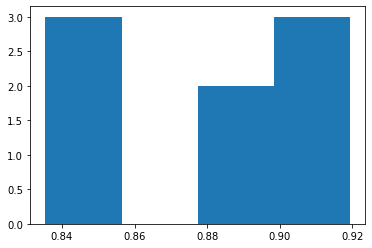

In [21]:
plt.hist(filtered_label2[:,7],bins=4)

(array([ 1.,  0.,  0., 24.]),
 array([0.47237659, 0.58229462, 0.69221264, 0.80213067, 0.91204869]),
 <BarContainer object of 4 artists>)

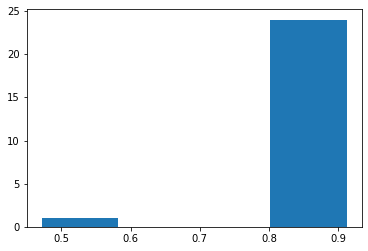

In [22]:
plt.hist(filtered_label3[:,7],bins=4)

(array([ 2.,  4., 45., 33.]),
 array([0.61846844, 0.70558905, 0.79270966, 0.87983026, 0.96695087]),
 <BarContainer object of 4 artists>)

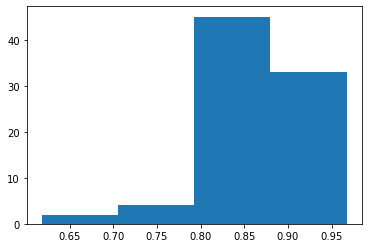

In [23]:
plt.hist(filtered_label4[:,7],bins=4)

Następnie obliczamy średnie wartości maksymalnego zwrotu w ramach klastra:

In [24]:
filtered_label0[:,7].mean()


0.8288882660827352

In [25]:
filtered_label1[:,7].mean()


0.8685519497103464

In [26]:
filtered_label2[:,7].mean()

0.8819101368711569

In [27]:
filtered_label3[:,7].mean()

0.8497375618943032

In [28]:
filtered_label4[:,7].mean()

0.864815976993977

Kolejnym krokiem jest analiza składowch głównychi redukcja wymiarów. Przyjęto, że w dalszej analizie pod uwagę będzie branych 6 głównych składowych.

In [29]:
pca = PCA(n_components=6)#,svd_solver='arpack')
pca_components = pca.fit_transform(x_scaler)
pca_df = pd.DataFrame(data = pca_components, columns = ['PC1', 'PC2', 'PC3','PC4','PC5','PC6'])#])

pca.explained_variance_ratio_

array([0.22007963, 0.18814173, 0.12586816, 0.11286699, 0.09533926,
       0.09298832])

Wyjaśniają one w sumie blisko 84% wariancji orginalnego zbioru.

In [30]:
pca.explained_variance_ratio_.sum()

0.8352840806276186

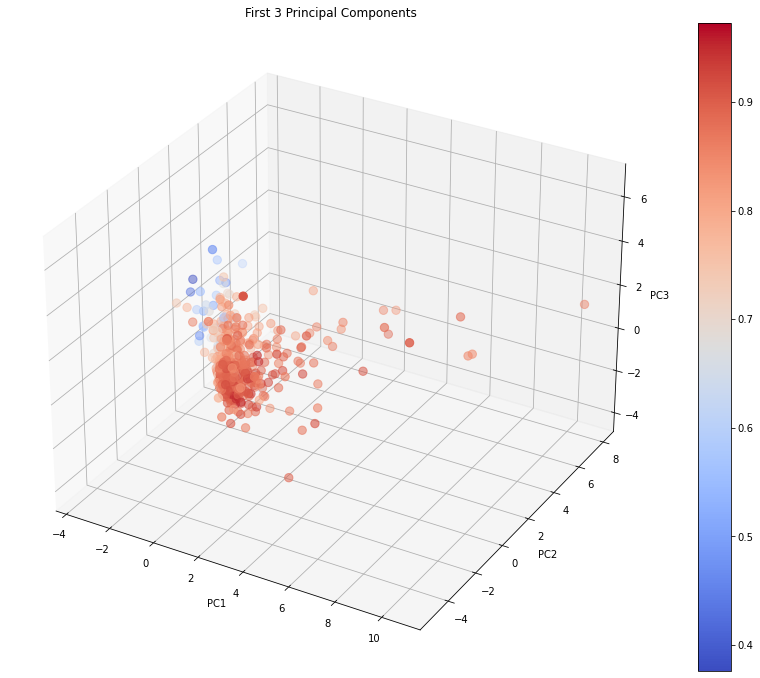

In [31]:


fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)
cb = ax.scatter(pca_df.PC1,pca_df.PC2,pca_df.PC3, c=y_max,s=70, cmap='coolwarm')

plt.title('First 3 Principal Components')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_zlabel('PC3')

plt.colorbar(cb)

Na danych zyskanych przez PCA wykonujemy ponownie analizę skupień.

[[ 5.17376601  3.4639439   0.85222687 -0.86118283 -0.38791589 -0.83638794]
 [ 1.11550408 -2.07066598  1.71546154  0.29265858 -0.2552582   0.57505166]
 [-1.04190624  0.85053888  0.56433406 -0.14331623  0.12922325  0.10596153]
 [ 0.30379688  2.89385354  1.29827769 14.40330505  1.05234342 -2.86711342]
 [ 0.1847346  -0.40484024 -0.58455445 -0.01583971 -0.0282784  -0.07079607]]


Text(0.5, 0, 'PC3')

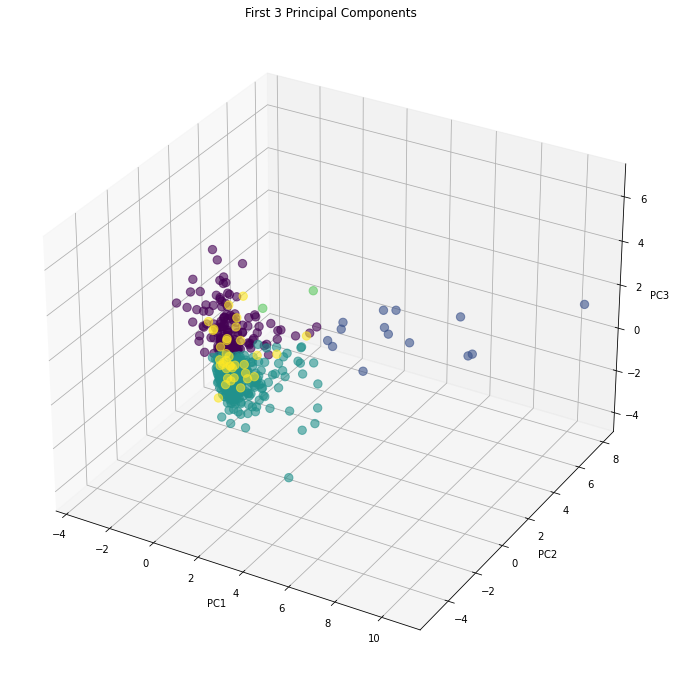

In [32]:
kmeans = KMeans(n_clusters=5).fit(pca_df)
centroids = kmeans.cluster_centers_
print(centroids)
label2 = kmeans.fit_predict(pca_df)

fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)
cb = ax.scatter(pca_df.PC1,pca_df.PC2,pca_df.PC3, c=kmeans.labels_.astype(float),s=70, alpha=0.6)

#plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

plt.title('First 3 Principal Components')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_zlabel('PC3')

Liczebność klastrów uległa lekkiej zmianie - wciąż mamy 1 główny, jest on teraz jednak wyraźnie mniej liczny; drugi pod względem rozmiaru klaster jest teraz niemal dwukrotnie większy, pozostałe zaś wciąż mają bardzo mało danych, przy czym najmniejszy zawiera zaledwie 2 obserwacje, co bardzo utrudnia sensowną analizę - na podstawie prób z mniejszą ilością klastrów można jednak wnioskować, że zawarte są tam outliery, które nawet przy 3 klastrach potrafiły się wyodrębniać od reszty.

In [33]:
unique, counts = np.unique(label2, return_counts=True)
dict(zip(unique, counts))

{0: 159, 1: 14, 2: 284, 3: 2, 4: 36}

Powtarzamy kroki wykonywane wcześniej.

In [35]:
filtered_label20 = x[label2 == 0]
filtered_label21 = x[label2 == 1]
filtered_label22 = x[label2 == 2]
filtered_label23 = x[label2 == 3]
filtered_label24 = x[label2 == 4]

(array([  7.,  15.,  32., 105.]),
 array([0.37606336, 0.50778032, 0.63949728, 0.77121424, 0.9029312 ]),
 <BarContainer object of 4 artists>)

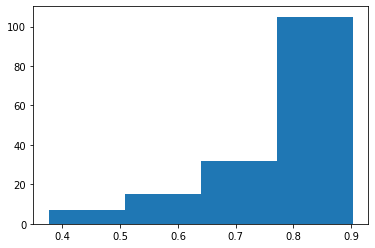

In [37]:
plt.hist(filtered_label20[:,7],bins=4)

(array([7., 2., 2., 3.]),
 array([0.83302108, 0.85212533, 0.87122958, 0.89033383, 0.90943808]),
 <BarContainer object of 4 artists>)

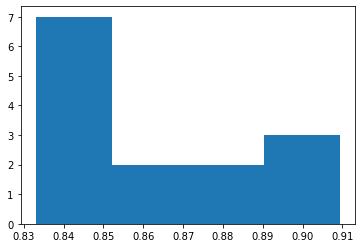

In [38]:
plt.hist(filtered_label21[:,7],bins=4)

(array([  3.,  17., 149., 115.]),
 array([0.6394081 , 0.72277651, 0.80614492, 0.88951333, 0.97288174]),
 <BarContainer object of 4 artists>)

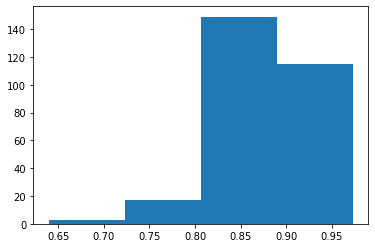

In [39]:
plt.hist(filtered_label22[:,7],bins=4)

(array([1., 0., 0., 1.]),
 array([0.7570523 , 0.77092561, 0.78479891, 0.79867222, 0.81254553]),
 <BarContainer object of 4 artists>)

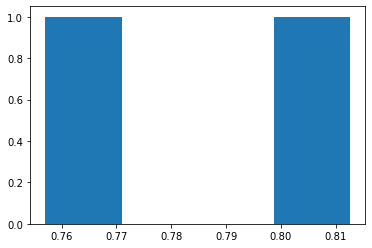

In [40]:
plt.hist(filtered_label23[:,7],bins=4)

(array([ 2.,  2., 16., 16.]),
 array([0.71693291, 0.77242361, 0.82791431, 0.88340501, 0.93889571]),
 <BarContainer object of 4 artists>)

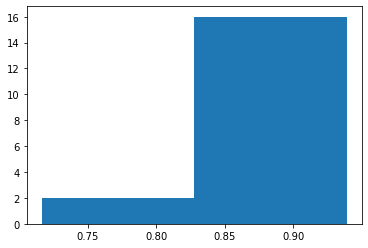

In [41]:
plt.hist(filtered_label24[:,7],bins=4)

In [42]:
filtered_label20[:,7].mean()


0.7651743801538999

In [43]:
filtered_label21[:,7].mean()


0.8643153125327945

In [44]:
filtered_label22[:,7].mean()


0.8726655476754718

In [45]:
filtered_label23[:,7].mean()


0.7847989130330214

In [46]:
filtered_label24[:,7].mean()


0.8703126306953117

Finalnym krokiem jest porównanie średnich uzyskanych w obu klasteryzacjach - nie porównujemy tu klastrów po "numerkach", a po podobieństwach rozkładów i liczebności, gdyż ich numerowanie jest losowe.

In [52]:
filtered_label20[:,7].mean()/filtered_label2[:,7].mean()

0.8676330480434068

In [54]:
filtered_label21[:,7].mean()/filtered_label3[:,7].mean()

1.0171555916699662

In [55]:
filtered_label22[:,7].mean()/filtered_label1[:,7].mean()

1.0047361565033586

In [56]:
filtered_label23[:,7].mean()/filtered_label4[:,7].mean()

0.9074750396736566

In [53]:
filtered_label24[:,7].mean()/filtered_label0[:,7].mean()

1.0499758125523297

Niestety, finalnie nie udało się uzyskać zadanego poziomu podobieństwa średnich w 2 klastrach - drugim pod względem wielkości oraz najmniejszym. Można jednak po części to usprawiedliwić rożnicami w rozmiarach - ten pierwszy urósł niemal dwukrotnie po zastosowaniu PCA, co wpłynęło w dużym stopniu na dane; z kolei ten drugi zmniejszył się o kilka obserwacji, ale po PCA zawiera zaledwie 2 spółki, co też trudno tratować jako miarodajny materiał do porównania.